# Tribal & Rural Health Infrastructure and Infant Outcomes: A Data-Driven Study from India

### üìä Project Overview
This analysis explores healthcare access and service delivery for tribal and rural populations in India using government data (NDAP/NITI Aayog, 2013‚Äì2005). The focus is on:
- Health infrastructure (coverage & ratios)
- Service utilization (ICDS, food, checkups)
- Infant and perinatal outcomes

**Tools:** Python, Pandas, Matplotlib, Seaborn


### 1.Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

### 2.Read the files

In [4]:
health_infrastructure = pd.read_csv(r"C:\Users\nagal\OneDrive\Documents\Excel files\NDAP_REPORT_2550.csv", index_col=0)
health_infrastructure.head()

Country  SourceYear                           Indicator  \
ROWID                                                           
4       India        2013            Present Average Coverage   
1       India        2013                      National Norms   
2       India        2013              National Norms_General   
3       India        2013  National Norms_Tribal/Hilly/Desert   

       Rural population according to census 2011 provisional covered by a sub centre (UOM:Number) |Scaling Factor:1  \
ROWID                                                                                                                 
4                                                 5615.0                                                              
1                                                    NaN                                                              
2                                                 5000.0                                                              
3                                                 3000.0                                                              

       Rural population according to census 2011 provisional covered by a primary health centre (phc) (UOM:Number) |Scaling Factor:1  \
ROWID                                                                                                                                  
4                                                34641.0                                                                               
1                                                    NaN                                                                               
2                                                30000.0                                                                               
3                                                20000.0                                                                               

       Rural population according to census 2011 provisional covered by a community health centre (chc) (UOM:Number) |Scaling Factor:1  \
ROWID                                                                                                                                    
4                                               172375.0                                                                                 
1                                                    NaN                                                                                 
2                                               120000.0                                                                                 
3                                                80000.0                                                                                 

       Number of sub centres per primary health centre (phc) (UOM:Number) |Scaling Factor:1  \
ROWID                                                                                         
4                                                    6.0                                      
1                                                    6.0                                      
2                                                    NaN                                      
3                                                    NaN                                      

       Number of primary health centres (phcs) per community health centre (chc) (UOM:Number) |Scaling Factor:1  \
ROWID                                                                                                             
4                                                    5.0                                                          
1                                                    4.0                                                          
2                                                    NaN                                                          
3                                                    NaN                                                    

In [5]:
health_infrastructure.shape

(4, 23)

In [6]:
health_infrastructure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 4 to 3
Data columns (total 23 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Country                                                                                                                                                                           4 non-null      object 
 1   SourceYear                                                                                                                                                                        4 non-null      int64  
 2   Indicator                                                              

In [7]:
icds_services = pd.read_csv(r'C:\Users\nagal\OneDrive\Documents\Excel files\NDAP_REPORT_2552.csv', index_col=0)
icds_services.head(3)

Country SourceYear    Category  \
ROWID                                  
11      India    2005-06       Total   
12      India    2005-06       Total   
1       India    2005-06  Don't know   

      Type of integrated child development services (icds) services   \
ROWID                                                                  
11          Mother received from an AWC during pregnancy               
12      Mother received from an AWC while breast feeding               
1           Mother received from an AWC during pregnancy               

       Health checkups (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                          
11                                                  12.3       
12                                                   8.5       
1                                                   16.5       

       Health and nutrition education (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                         
11                                                  10.9                      
12                                                   8.3                      
1                                                   20.2                      

       No services (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                      
11                                                  77.5   
12                                                  82.6   
1                                                   63.5   

       Number of children (UOM:Number) |Scaling Factor:1  \
ROWID                                                      
11                                                 51887   
12                                                 51838   
1                                                    239   

       Supplementary food (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                             
11                                                  20.5          
12                                                  16.5          
1                                                   34.6          

                                  Additional information  YearCode  \
ROWID                                                                
11     Total includes children with missing informati...      2005   
12     Total includes children with missing informati...      2005   
1                                                    NaN      2005   

                                   Year  
ROWID                                    
11     Financial Year (Apr - Mar), 2005  
12     Financial Year (Apr - Mar), 2005  
1      Financial Year (Apr - Mar), 2005

In [8]:
icds_services.shape

(12, 12)

In [9]:
icds_services.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 11 to 10
Data columns (total 12 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country                                                               12 non-null     object 
 1   SourceYear                                                            12 non-null     object 
 2   Category                                                              12 non-null     object 
 3   Type of integrated child development services (icds) services         12 non-null     object 
 4   Health checkups (UOM:%(Percentage)) |Scaling Factor:1                 12 non-null     float64
 5   Health and nutrition education (UOM:%(Percentage)) |Scaling Factor:1  12 non-null     float64
 6   No services (UOM:%(Percentage)) |Scaling Factor:1                     12 non-null     float64
 7   Numbe

In [10]:
supplementary_food = pd.read_csv(r'C:\Users\nagal\OneDrive\Documents\Excel files\NDAP_REPORT_2553.csv', index_col=0)
supplementary_food.head(2)

Country SourceYear    Category  \
ROWID                                  
6       India    2005-06       Total   
1       India    2005-06  Don't know   

       Percentage of children age 0 to 71 months receiving any services from an anganwadi centre (awc) (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                          
6                                                   32.9                                                                                       
1                                                   48.8                                                                                       

       Percentage among children in an area covered by an anganwadi centre (awc), frequency of not at all receiving supplementary food  (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                                                           
6                                                   73.5                                                                                                                        
1                                                   51.8                                                                                                                        

       Percentage among children in an area covered by an anganwadi centre (awc), frequency of almost daily receiving supplementary food  (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                                                             
6                                                   11.9                                                                                                                          
1                                                   22.3                                                                                                                          

       Percentage among children in an area covered by an anganwadi centre (awc), frequency of receiving supplementary food atleast once a week  (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                                                                    
6                                                    5.8                                                                                                                                 
1                                                    6.0                                                                                                                                 

       Percentage among children in an area covered by an anganwadi centre (awc), frequency of receiving supplementary food at least once a month  (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                                                                      
6                                                    5.6                                                                                                                                   
1                                                   18.4                                                                                                                                   

       Percentage among children in an area covered by an anganwadi centre (awc), frequency of receiving supplementary food less often  (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                                                  

In [11]:
supplementary_food.shape

(6, 14)

In [12]:
supplementary_food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 6 to 5
Data columns (total 14 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   Country                                                                                                                                                                            6 non-null      object 
 1   SourceYear                                                                                                                                                                         6 non-null      object 
 2   Category                                                           

In [13]:
health_checkups = pd.read_csv(r'C:\Users\nagal\OneDrive\Documents\Excel files\NDAP_REPORT_2554.csv', index_col=0)
health_checkups.head(3)

Country SourceYear    Category  \
ROWID                                  
6       India    2005-06       Total   
1       India    2005-06  Don't know   
2       India    2005-06       Other   

       Percentage of children age 0 to 71 months receiving any services from an anganwadi centre (awc) (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                          
6                                                   20.0                                                                                       
1                                                   19.1                                                                                       
2                                                   13.3                                                                                       

       Percentage of frequency of not at all receiving health check-ups at an anganwadi centre (awc) (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                        
6                                                   82.2                                                                                     
1                                                   66.1                                                                                     
2                                                   84.2                                                                                     

       Percenatge of frequency of receiving at least once a month health check ups at an anganwadi centre (awc)  (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                                    
6                                                   11.5                                                                                                 
1                                                   22.3                                                                                                 
2                                                    9.6                                                                                                 

       Percentage of frequency of receiving less often health check ups at an anganwadi centre (awc)  (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                         
6                                                    4.3                                                                                      
1                                                    5.0                                                                                      
2                                                    4.1                                                                                      

       Percentage of frequency of receiving dont know or missing health check ups at an anganwadi centre (awc)  (UOM:%(Percentage)) |Scaling Factor:1  \
ROWID                                                                                                                                                   
6                                                    2.0                                                                                                
1                                                    6.6                                                                                                
2                                                    2.0                                                                                                

       Number of children age 0 to 71 months living in an area covered by an anganwadi centre (awc)  (UOM:Number) |Scali

In [14]:
health_checkups.shape

(6, 12)

In [15]:
health_checkups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 6 to 5
Data columns (total 12 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   Country                                                                                                                                          6 non-null      object 
 1   SourceYear                                                                                                                                       6 non-null      object 
 2   Category                                                                                                                                         6 non-null      object 
 3   Percentage of children age 0 

In [16]:
infant_mortality = pd.read_csv(r'C:\Users\nagal\OneDrive\Documents\Excel files\NDAP_REPORT_2555.csv', index_col=0)
infant_mortality.head(3)

Country SourceYear Background characteristic includes caste or tribe   \
ROWID                                                                         
1       India    2005-06                                         Don't know   
2       India    2005-06                                              Other   
3       India    2005-06                               Other backward class   

       Number of still births (UOM:Number) |Scaling Factor:1  \
ROWID                                                          
1                                                      3       
2                                                    309       
3                                                    467       

       Number of early neonatal deaths (UOM:Number) |Scaling Factor:1  \
ROWID                                                                   
1                                                      3                
2                                                    438                
3                                                    676                

       Perinatal mortality rate (UOM:Ratio) |Scaling Factor:1  \
ROWID                                                           
1                                                   30.8        
2                                                   45.3        
3                                                   49.3        

       Number of pregnancies of 7 or more months duration (UOM:Number) |Scaling Factor:1  \
ROWID                                                                                      
1                                                    223                                   
2                                                  16485                                   
3                                                  23183                                   

                                  Additional information  YearCode  \
ROWID                                                                
1      Stillbirths are foetal deaths in pregnancies l...      2005   
2      Stillbirths are foetal deaths in pregnancies l...      2005   
3      Stillbirths are foetal deaths in pregnancies l...      2005   

                                   Year  
ROWID                                    
1      Financial Year (Apr - Mar), 2005  
2      Financial Year (Apr - Mar), 2005  
3      Financial Year (Apr - Mar), 2005

In [17]:
infant_mortality.shape

(6, 10)

In [18]:
infant_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1 to 6
Data columns (total 10 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country                                                                            6 non-null      object 
 1   SourceYear                                                                         6 non-null      object 
 2   Background characteristic includes caste or tribe                                  6 non-null      object 
 3   Number of still births (UOM:Number) |Scaling Factor:1                              6 non-null      int64  
 4   Number of early neonatal deaths (UOM:Number) |Scaling Factor:1                     6 non-null      int64  
 5   Perinatal mortality rate (UOM:Ratio) |Scaling Factor:1                             6 non-null      float64
 6   Num

### 3.Data Cleaning: Rename columns and Drop unrequired columns

#### A. Health Infrastructure

In [21]:
health_infrastructure.rename(columns={
    'Country': 'country',
    'Source_Year': 'source_year',
    'Indicator': 'indicator',
    'Rural population according to census 2011 provisional covered by a sub centre (UOM:Number) |Scaling Factor:1': 'subcentre_pop_coverage',
    'Rural population according to census 2011 provisional covered by a primary health centre (phc) (UOM:Number) |Scaling Factor:1': 'phc_pop_coverage',
    'Rural population according to census 2011 provisional covered by a community health centre (chc) (UOM:Number) |Scaling Factor:1': 'chc_pop_coverage',
    'Number of sub centres per primary health centre (phc) (UOM:Number) |Scaling Factor:1': 'subcentres_per_phc',
    'Number of primary health centres (phcs) per community health centre (chc) (UOM:Number) |Scaling Factor:1': 'phcs_per_chc',
    'Rural population according to census 2011 provisional covered by a health worker (female) hw (f) at sub centres and primary health centres (phcs) (UOM:Number) |Scaling Factor:1': 'subcentres_phcs_pop_coverage_by_hw_females',
    'Rural population according to census 2011 provisional covered by a health worker (male) hw (m) at sub centres (UOM:Number) |Scaling Factor:1': 'subcentres_pop_coverage_by_hw_males',
    'Ratio of health assistant (male) ha (m) at primary health centres (phcs) to health worker (male) hw (m) at sub centres': 'ha_phc_hw_sub_male_ratio',
    'Ratio of health assistant (female) ha (f) at primary health centres (phcs) to health worker (female) hw (f) at sub centres and primary health centres (phcs)': 'ha_phc_hw_sub_phc_female_ratio',
    'Average rural area covered by a sub centre (UOM:sq.km(SquareKilometer)) |Scaling Factor:1': 'avg_area_covered_by_subcentre',
    'Average rural area covered by a primary health centre (phc) (UOM:sq.km(SquareKilometer)) |Scaling Factor:1': 'avg_area_covered_by_phc',
    'Average rural area covered by a community health centre (chc) (UOM:sq.km(SquareKilometer)) |Scaling Factor:1': 'avg_area_covered_by_chc',
    'Average radial distance covered by a sub centre (UOM:km(Kilometer)) |Scaling Factor:1': 'avg_radial_distance_by_subcentres',
    'Average radial distance covered by a primary health centre (phc) (UOM:km(Kilometer)) |Scaling Factor:1': 'avg_radial_distance_by_phc',
    'Average radial distance covered by a community health centre (chc) (UOM:km(Kilometer)) |Scaling Factor:1': 'avg_radial_distance_by_chc',
    'Average number of villages covered by a sub centre (UOM:Number) |Scaling Factor:1': 'avg_villages_covered_by_subcentre',
    'Average number of villages covered by a primary health centre (phc) (UOM:Number) |Scaling Factor:1': 'avg_villages_covered_by_phc',
    'Average number of villages covered by a community health centre (chc) (UOM:Number) |Scaling Factor:1': 'avg_villages_covered_by_chc',
    'YearCode': 'year_code',
    'Year': 'year'
}, inplace=True)


In [22]:
health_infrastructure.head(2)

country  SourceYear                 indicator  subcentre_pop_coverage  \
ROWID                                                                         
4       India        2013  Present Average Coverage                  5615.0   
1       India        2013            National Norms                     NaN   

       phc_pop_coverage  chc_pop_coverage  subcentres_per_phc  phcs_per_chc  \
ROWID                                                                         
4               34641.0          172375.0                 6.0           5.0   
1                   NaN               NaN                 6.0           4.0   

       subcentres_phcs_pop_coverage_by_hw_females  \
ROWID                                               
4                                          4500.0   
1                                             NaN   

       subcentres_pop_coverage_by_hw_males ha_phc_hw_sub_male_ratio  \
ROWID                                                                 
4                                  16112.0                      1:3   
1                                      NaN                      1:6   

      ha_phc_hw_sub_phc_female_ratio  \
ROWID                                  
4                               1:11   
1                                1:6   

       Average rural area covered by a sub centre  (UOM:sq.km(SquareKilometer)) |Scaling Factor:1  \
ROWID                                                                                               
4                                                  21.02                                            
1                                                    NaN                                            

       avg_area_covered_by_phc  avg_area_covered_by_chc  \
ROWID                                                     
4                       129.66                   645.21   
1                          NaN                      NaN   

       avg_radial_distance_by_subcentres  avg_radial_distance_by_phc  \
ROWID                                                                  
4                                   2.59                        6.42   
1                                    NaN                         NaN   

       avg_radial_distance_by_chc  avg_villages_covered_by_subcentre  \
ROWID                                                                  
4                           14.33                                4.0   
1                             NaN                                NaN   

       avg_villages_covered_by_phc  \
ROWID                                
4                             27.0   
1                              NaN   

       Average number of villages covered by a community health centre (chc)  (UOM:Number) |Scaling Factor:1  \
ROWID                                                                                                          
4                                                  133.0                                                       
1                                                    NaN                                                       

       year_code                             year  
ROWID                                              
4           2013  Calendar Year (Jan - Dec), 2013  
1           2013  Calendar Year (Jan - Dec), 2013

In [23]:
print(repr(health_infrastructure.columns[12]))


'Average rural area covered by a sub centre  (UOM:sq.km(SquareKilometer)) |Scaling Factor:1'


In [24]:
print(repr(health_infrastructure.columns[20]))

'Average number of villages covered by a community health centre (chc)  (UOM:Number) |Scaling Factor:1'


In [25]:
health_infrastructure.rename(columns={
    'Average rural area covered by a sub centre  (UOM:sq.km(SquareKilometer)) |Scaling Factor:1': 'avg_area_covered_by_subcentre',
    'Average number of villages covered by a community health centre (chc)  (UOM:Number) |Scaling Factor:1': 'avg_villages_covered_by_chc'
},
inplace=True)

In [26]:
health_infrastructure.drop(columns=['country','year_code','year'], inplace=True)


In [27]:
health_infrastructure

SourceYear                           indicator  subcentre_pop_coverage  \
ROWID                                                                           
4            2013            Present Average Coverage                  5615.0   
1            2013                      National Norms                     NaN   
2            2013              National Norms_General                  5000.0   
3            2013  National Norms_Tribal/Hilly/Desert                  3000.0   

       phc_pop_coverage  chc_pop_coverage  subcentres_per_phc  phcs_per_chc  \
ROWID                                                                         
4               34641.0          172375.0                 6.0           5.0   
1                   NaN               NaN                 6.0           4.0   
2               30000.0          120000.0                 NaN           NaN   
3               20000.0           80000.0                 NaN           NaN   

       subcentres_phcs_pop_coverage_by_hw_females  \
ROWID                                               
4                                          4500.0   
1                                             NaN   
2                                          5000.0   
3                                          3000.0   

       subcentres_pop_coverage_by_hw_males ha_phc_hw_sub_male_ratio  \
ROWID                                                                 
4                                  16112.0                      1:3   
1                                      NaN                      1:6   
2                                   5000.0                      NaN   
3                                   3000.0                      NaN   

      ha_phc_hw_sub_phc_female_ratio  avg_area_covered_by_subcentre  \
ROWID                                                                 
4                               1:11                          21.02   
1                                1:6                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   

       avg_area_covered_by_phc  avg_area_covered_by_chc  \
ROWID                                                     
4                       129.66                   645.21   
1                          NaN                      NaN   
2                          NaN                      NaN   
3                          NaN                      NaN   

       avg_radial_distance_by_subcentres  avg_radial_distance_by_phc  \
ROWID                                                                  
4                                   2.59                        6.42   
1                                    NaN                         NaN   
2                                    NaN                         NaN   
3                                    NaN                         NaN   

       avg_radial_distance_by_chc  avg_villages_covered_by_subcentre  \
ROWID                                                                  
4                           14.33                                4.0   
1                             NaN                                NaN   
2                             NaN                                NaN   
3                             NaN                                NaN   

       avg_villages_covered_by_phc  avg_villages_covered_by_chc  
ROWID                                                            
4                             27.0                        133.0  
1                              NaN                          NaN  
2                              NaN                          NaN  
3                              NaN                          NaN

#### B. ICDS Services

In [29]:
import re
icds_services.columns = icds_services.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

In [30]:
icds_services.rename(columns={
    'Country': 'country',
    'SourceYear': 'source_year',
    'Category': 'category',
    'Type of integrated child development services (icds) services' : 'icds_services',
    'Health checkups (UOM:%(Percentage)) |Scaling Factor:1': 'health_checkups_%',
    'Health and nutrition education (UOM:%(Percentage)) |Scaling Factor:1': 'health_nutrition_education_%',
    'No services (UOM:%(Percentage)) |Scaling Factor:1': 'no_services_%',
    'Number of children (UOM:Number) |Scaling Factor:1': 'no_of_children',
    'Supplementary food (UOM:%(Percentage)) |Scaling Factor:1': 'supplementary_food_%',
    'Additional information': 'notes',
    'YearCode': 'year_code',
    'Year': 'year'
},
inplace=True)

In [31]:
icds_services.drop(['country','year_code','year'], axis=1, inplace=True)

In [32]:
icds_services.sort_index().head(3)

source_year    category  \
ROWID                           
1         2005-06  Don't know   
2         2005-06  Don't know   
3         2005-06       Other   

                                          icds_services  health_checkups_%  \
ROWID                                                                        
1          Mother received from an AWC during pregnancy               16.5   
2      Mother received from an AWC while breast feeding               11.3   
3          Mother received from an AWC during pregnancy                7.2   

       health_nutrition_education_%  no_services_%  no_of_children  \
ROWID                                                                
1                              20.2           63.5             239   
2                              14.4           77.9             237   
3                               6.7           85.0           13766   

       supplementary_food_% notes  
ROWID                              
1                      34.6   NaN  
2                      21.1   NaN  
3                      13.1   NaN

#### C. Supplementary Food

In [34]:
supplementary_food.columns = supplementary_food.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

In [35]:
supplementary_food.rename(columns={
    'Country': 'country',
    'SourceYear': 'source_year',
    'Category': 'category',
    'Percentage of children age 0 to 71 months receiving any services from an anganwadi centre (awc) (UOM:%(Percentage)) |Scaling Factor:1': 'any_awc_service_pct',
    'Percentage among children in an area covered by an anganwadi centre (awc), frequency of not at all receiving supplementary food (UOM:%(Percentage)) |Scaling Factor:1': 'no_supplementary_food_pct',
    'Percentage among children in an area covered by an anganwadi centre (awc), frequency of almost daily receiving supplementary food (UOM:%(Percentage)) |Scaling Factor:1': 'daily_supplementary_food_pct',
    'Percentage among children in an area covered by an anganwadi centre (awc), frequency of receiving supplementary food atleast once a week (UOM:%(Percentage)) |Scaling Factor:1': 'weekly_supplementary_food_pct',
    'Percentage among children in an area covered by an anganwadi centre (awc), frequency of receiving supplementary food at least once a month (UOM:%(Percentage)) |Scaling Factor:1': 'monthly_supplementary_food_pct',
    'Percentage among children in an area covered by an anganwadi centre (awc), frequency of receiving supplementary food less often (UOM:%(Percentage)) |Scaling Factor:1': 'rare_supplementary_food_pct',
    'Percentage among children in an area covered by an anganwadi centre (awc), frequency of receiving dont know or missing supplementary food (UOM:%(Percentage)) |Scaling Factor:1': 'unknown_supplementary_food_pct',
    'Number of children age 0 to 71 months living in an area covered by an anganwadi centre (awc) (UOM:Number) |Scaling Factor:1': 'num_children_awc_area',
    'Additional information': 'notes',
    'YearCode': 'year_code',
    'Year': 'year'
}, inplace=True)


In [36]:
supplementary_food.drop(['country','year_code','year'], axis=1, inplace=True)

In [37]:
supplementary_food.head(2)

source_year    category  any_awc_service_pct  no_supplementary_food_pct  \
ROWID                                                                           
6         2005-06       Total                 32.9                       73.5   
1         2005-06  Don't know                 48.8                       51.8   

       daily_supplementary_food_pct  weekly_supplementary_food_pct  \
ROWID                                                                
6                              11.9                            5.8   
1                              22.3                            6.0   

       monthly_supplementary_food_pct  rare_supplementary_food_pct  \
ROWID                                                                
6                                 5.6                          3.0   
1                                18.4                          1.1   

       unknown_supplementary_food_pct  num_children_awc_area  \
ROWID                                                          
6                                 0.2                  51887   
1                                 0.5                    239   

                                                   notes  
ROWID                                                     
6      Total includes children with missing informati...  
1                                                    NaN

#### D. Health Checkups

In [39]:
health_checkups.columns = health_checkups.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

In [40]:
health_checkups.rename(columns={
    'Country': 'country',
    'SourceYear': 'source_year',
    'Category': 'category',
    'Percentage of children age 0 to 71 months receiving any services from an anganwadi centre (awc) (UOM:%(Percentage)) |Scaling Factor:1': 'any_awc_service_pct',
    'Percentage of frequency of not at all receiving health check-ups at an anganwadi centre (awc) (UOM:%(Percentage)) |Scaling Factor:1': 'no_health_checkup_pct',
    'Percenatge of frequency of receiving at least once a month health check ups at an anganwadi centre (awc) (UOM:%(Percentage)) |Scaling Factor:1': 'monthly_health_checkup_pct',
    'Percentage of frequency of receiving less often health check ups at an anganwadi centre (awc) (UOM:%(Percentage)) |Scaling Factor:1': 'rare_health_checkup_pct',
    'Percentage of frequency of receiving dont know or missing health check ups at an anganwadi centre (awc) (UOM:%(Percentage)) |Scaling Factor:1': 'unknown_health_checkup_pct',
    'Number of children age 0 to 71 months living in an area covered by an anganwadi centre (awc) (UOM:Number) |Scaling Factor:1': 'num_children_awc_area',
    'Additional information': 'notes',
    'YearCode': 'year_code',
    'Year': 'year'
}, inplace=True)


In [41]:
health_checkups.drop(['country','year_code','year'], axis=1, inplace=True)

In [42]:
health_checkups.head(2)

source_year    category  any_awc_service_pct  no_health_checkup_pct  \
ROWID                                                                       
6         2005-06       Total                 20.0                   82.2   
1         2005-06  Don't know                 19.1                   66.1   

       monthly_health_checkup_pct  rare_health_checkup_pct  \
ROWID                                                        
6                            11.5                      4.3   
1                            22.3                      5.0   

       unknown_health_checkup_pct  num_children_awc_area  \
ROWID                                                      
6                             2.0                  51887   
1                             6.6                    239   

                                                   notes  
ROWID                                                     
6       Total includes children with missing informat...  
1                                                    NaN

#### E. Infant Mortality

In [44]:
infant_mortality.columns = infant_mortality.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

In [45]:
infant_mortality.rename(columns={
    'Country': 'country',
    'SourceYear': 'source_year',
    'Background characteristic includes caste or tribe': 'category',
    'Number of still births (UOM:Number) |Scaling Factor:1': 'stillbirths',
    'Number of early neonatal deaths (UOM:Number) |Scaling Factor:1': 'early_neonatal_deaths',
    'Perinatal mortality rate (UOM:Ratio) |Scaling Factor:1': 'perinatal_mortality_rate',
    'Number of pregnancies of 7 or more months duration (UOM:Number) |Scaling Factor:1': 'pregnancies_7plus_months',
    'Additional information': 'notes',
    'YearCode': 'year_code',
    'Year': 'year'
}, inplace=True)


In [46]:
infant_mortality.drop(['country','year_code','year'], axis=1, inplace=True)

In [47]:
infant_mortality.head(2)

source_year    category  stillbirths  early_neonatal_deaths  \
ROWID                                                               
1         2005-06  Don't know            3                      3   
2         2005-06       Other          309                    438   

       perinatal_mortality_rate  pregnancies_7plus_months  \
ROWID                                                       
1                          30.8                       223   
2                          45.3                     16485   

                                                   notes  
ROWID                                                     
1      Stillbirths are foetal deaths in pregnancies l...  
2      Stillbirths are foetal deaths in pregnancies l...

### 4. Exploraroty Data Analysis

### üìå Health Infrastructure Coverage (Subcentres, PHCs, CHCs)

In [50]:
health_infrastructure.sort_index(inplace=True)

In [51]:
df=health_infrastructure.groupby('indicator')[['subcentre_pop_coverage', 'phc_pop_coverage','chc_pop_coverage']].mean()
df

subcentre_pop_coverage  phc_pop_coverage  \
indicator                                                                      
National Norms                                         NaN               NaN   
National Norms_General                              5000.0           30000.0   
National Norms_Tribal/Hilly/Desert                  3000.0           20000.0   
Present Average Coverage                            5615.0           34641.0   

                                    chc_pop_coverage  
indicator                                             
National Norms                                   NaN  
National Norms_General                      120000.0  
National Norms_Tribal/Hilly/Desert           80000.0  
Present Average Coverage                    172375.0

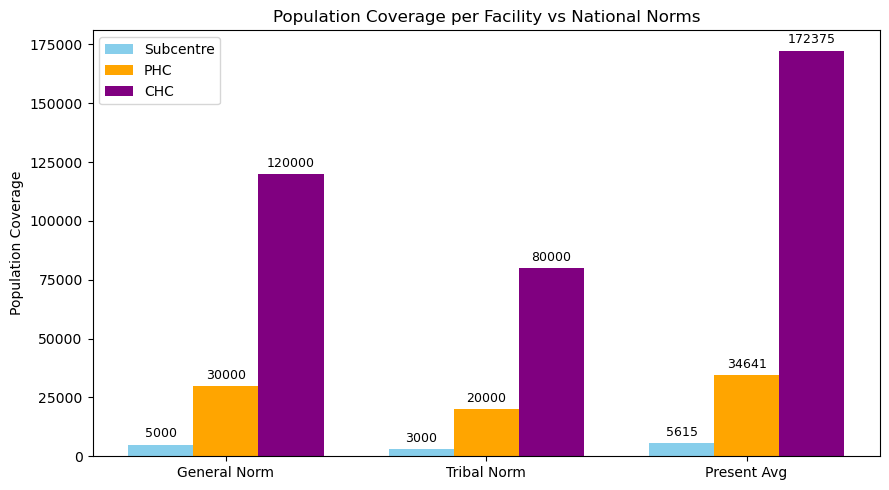

In [113]:
# Data
labels = ['General Norm', 'Tribal Norm', 'Present Avg']
subcentre = [5000, 3000, 5615]
phc = [30000, 20000, 34641]
chc = [120000, 80000, 172375]

x = np.arange(len(labels))
width = 0.25

# Create grouped bar chart
plt.figure(figsize=(9,5))

# Plot each bar group and capture them
bars1 = plt.bar(x - width, subcentre, width, label='Subcentre', color='skyblue')
bars2 = plt.bar(x, phc, width, label='PHC', color='orange')
bars3 = plt.bar(x + width, chc, width, label='CHC', color='purple')

# Add data labels on top of bars
plt.bar_label(bars1, padding=3, fontsize=9)
plt.bar_label(bars2, padding=3, fontsize=9)
plt.bar_label(bars3, padding=3, fontsize=9)

# Formatting
plt.xticks(x, labels)
plt.ylabel("Population Coverage")
plt.title("Population Coverage per Facility vs National Norms")
plt.legend()
plt.tight_layout()
plt.show()


üìä Insight: Population Coverage per Health Facility vs National Norms

The chart compares current average population coverage of subcentres, Primary Health Centres (PHCs), and Community Health Centres (CHCs) against the recommended national norms for both general and tribal areas.

Subcentres and PHCs show a moderate deviation from national norms. For instance, the average population coverage per subcentre is approximately 5615, slightly higher than the recommended norms (5000 for general and 3000 for tribal regions). PHCs also reflect a similar overextension at 34641, compared to the general norm of 30,000.

In contrast, CHCs are significantly overburdened, with an average coverage of 172,375 individuals ‚Äî far exceeding the national benchmark of 120,000 for general areas and 80,000 for tribal regions. This stark gap indicates that CHCs may be under severe operational pressure, potentially leading to service delays, overcrowding, or limited healthcare accessibility.

üìå Recommendations:
CHCs require urgent review: Policymakers and local health authorities should assess whether existing CHCs are adequately staffed and resourced, and consider establishing additional CHCs in overburdened regions to rebalance service loads.

Evaluate service sufficiency at Subcentres and PHCs: Although they are marginally overburdened, it‚Äôs critical to evaluate whether the infrastructure and workforce at these centres are sufficient to maintain service quality.
Contextual planning is key: Future infrastructure planning should account for population growth, tribal-specific needs, and geographical challenges to ensure health facilities remain accessible and effective.


In [54]:
health_infrastructure.groupby('indicator')[['subcentres_per_phc','phcs_per_chc']].mean()


subcentres_per_phc  phcs_per_chc
indicator                                                           
National Norms                                     6.0           4.0
National Norms_General                             NaN           NaN
National Norms_Tribal/Hilly/Desert                 NaN           NaN
Present Average Coverage                           6.0           5.0

üè• Insight: Ratio of Subcentres and PHCs per PHC and CHC (Health Infrastructure Distribution)

This table illustrates the average number of subcentres per PHC and PHCs per CHC, comparing present infrastructure coverage against national norms.

As observed, National Norms for general and tribal areas are unspecified for these ratios. However, comparing the available benchmark (labelled "National Norms") with the current scenario reveals that the present average matches or exceeds expectations.

Specifically, the number of subcentres per PHC remains consistent at 6, which aligns exactly with the national standard. Similarly, the number of PHCs per CHC exceeds the norm, with a value of 5 compared to the recommended 4, indicating a slightly more extensive network at the PHC-to-CHC level.

üìå Interpretation & Recommendations:
‚úÖ Subcentre and PHC Infrastructure is Adequately Structured: These figures confirm that the health facility hierarchy from subcentre to PHC is in line with national guidelines, and no immediate restructuring is necessary at these levels.

Focus Should Shift to CHC Strengthening: As earlier visualizations showed, CHCs are significantly overburdened in terms of population coverage. While the structural ratio is acceptable, this imbalance likely stems from inadequate CHC capacity, staffing, or distribution ‚Äî rather than upstream facility issues.

Actionable Insight: Efforts should prioritize enhancing CHC infrastructure, either by scaling capacity or constructing additional CHCs in underserved areas, rather than altering the upstream ratios of subcentres and PHCs.

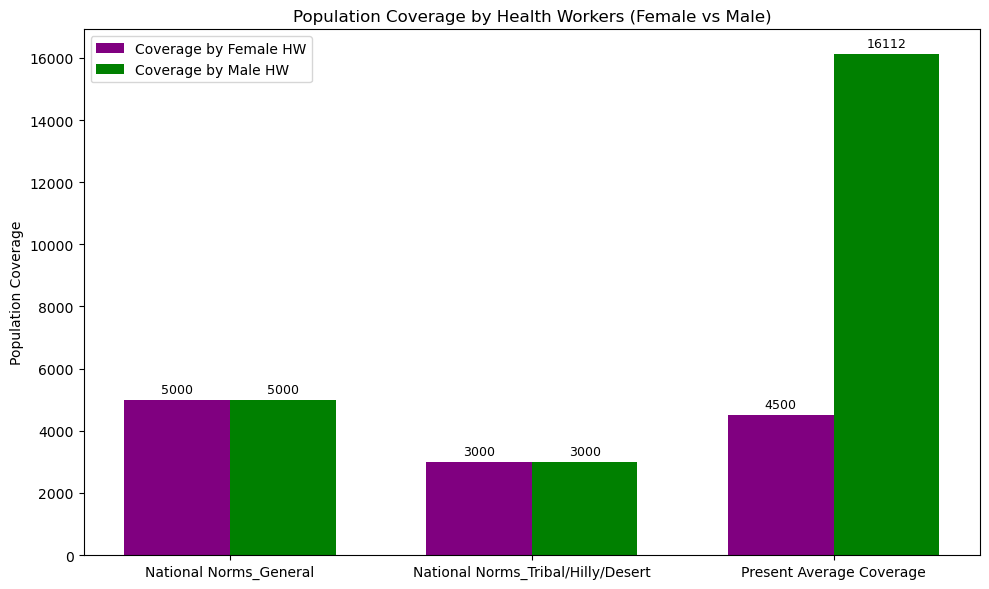

In [55]:
# Filter only rows with non-null values
df_plot = health_infrastructure[
    health_infrastructure[['subcentres_phcs_pop_coverage_by_hw_females', 'subcentres_pop_coverage_by_hw_males']].notnull().all(axis=1)
]

# Set bar positions
x = np.arange(len(df_plot['indicator']))
width = 0.35

# Create the plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, df_plot['subcentres_phcs_pop_coverage_by_hw_females'], width, label='Coverage by Female HW', color='purple')
bars2 = plt.bar(x + width/2, df_plot['subcentres_pop_coverage_by_hw_males'], width, label='Coverage by Male HW', color='green')

# Add value labels on top of bars
plt.bar_label(bars1, padding=3, fontsize=9)
plt.bar_label(bars2, padding=3, fontsize=9)

# Format plot
plt.xticks(x, df_plot['indicator'], rotation=0)
plt.ylabel("Population Coverage")
plt.title("Population Coverage by Health Workers (Female vs Male)")
plt.legend()
plt.tight_layout()
plt.show()



üë©‚Äç‚öïÔ∏èInsight: Population Coverage by Female vs Male Health Workers
This chart compares the population coverage load handled by female and male health workers based on the present average versus national norms (both general and tribal).

Female health workers (HWs) are covering approximately 4500 individuals, which is within acceptable limits when compared to the general norm (5000) and tribal norm (3000). This indicates that the current staffing of female HWs is largely aligned with national expectations.

In contrast, male health workers are significantly overburdened, managing a population of 16,112 on average ‚Äî more than three times the standard coverage limit. This disparity strongly suggests a shortfall in male health workforce deployment at subcentres.

üìå Recommendations:
Urgent staffing intervention is needed to recruit or deploy more male health workers in rural and tribal areas to restore balance and ensure equitable service delivery.

Female health staffing appears adequate, but continued monitoring is necessary to prevent overburdening in regions with growing populations.

Balanced workforce planning is essential for operational efficiency, gender parity in outreach, and addressing the unique needs of male and female patients in community settings.

In [56]:
df = health_infrastructure.set_index('indicator')[['ha_phc_hw_sub_male_ratio',	'ha_phc_hw_sub_phc_female_ratio']]
df

ha_phc_hw_sub_male_ratio  \
indicator                                                     
National Norms                                          1:6   
National Norms_General                                  NaN   
National Norms_Tribal/Hilly/Desert                      NaN   
Present Average Coverage                                1:3   

                                   ha_phc_hw_sub_phc_female_ratio  
indicator                                                          
National Norms                                                1:6  
National Norms_General                                        NaN  
National Norms_Tribal/Hilly/Desert                            NaN  
Present Average Coverage                                     1:11

üßÆ Insight: Ratio of Health Assistants to Health Workers (Male vs Female)

This table presents the staffing ratio of Health Assistants (HA) to Health Workers (HW) across Primary Health Centres (PHCs) and Subcentres for both genders, compared to national norms.

According to national guidelines, the expected ratio is 1:6 for both male and female health assistants to their corresponding health workers.

However, the present average coverage reveals a mismatch:

Male HA to HW ratio stands at 1:3, indicating a shortage of male health workers at the subcentre level.

Female HA to HW ratio is 1:11, implying a disproportionately high number of female health workers compared to assistants, possibly due to overstaffing or under-allocation of supervisory roles.

üìå Interpretation & Recommendations:
The male ratio suggests a staffing imbalance, reinforcing earlier findings that male health workers are underrepresented and overburdened in rural service delivery.

The inflated female ratio may reflect an over-reliance on female frontline staff, or a gap in supervisory support (i.e., insufficient female health assistants at PHCs to support a large base of female HWs).

Balanced gender-based staffing is critical for effective healthcare delivery. Authorities should consider:

Increasing male HW recruitment

Reassessing deployment of female health assistants to improve the supervision-to-service ratio

### üë∂ ICDS Services during Pregnancy & Breastfeeding

In [58]:
icds_services.sort_index(inplace=True)

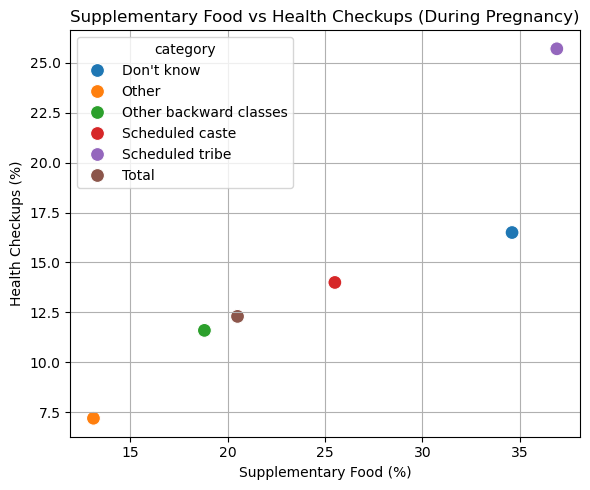

In [59]:
# Filter for "During Pregnancy"
df_preg = icds_services[icds_services['icds_services'] == 'Mother received from an AWC during pregnancy']

# Plot
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df_preg,
    x='supplementary_food_%',
    y='health_checkups_%',
    hue='category',
    s=100
)
plt.title("Supplementary Food vs Health Checkups (During Pregnancy)")
plt.xlabel("Supplementary Food (%)")
plt.ylabel("Health Checkups (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


üß∫üë©‚Äç‚öïÔ∏è Insight: Supplementary Food vs Health Checkups (During Pregnancy)
The scatter plot shows a positive correlation between food and health checkup access during pregnancy.

Scheduled Tribes have the highest access to both services (~37% food, ~26% checkups), indicating effective outreach.

SCs and OBCs show moderate access, suggesting scope for improved follow-up care.

‚ÄòDon‚Äôt Know‚Äô group has good food access but lower health monitoring ‚Äî may signal disconnect or data gaps.

‚ÄòOther‚Äô group reports lowest access, possibly due to marginalization or reporting issues.

üìå Recommendations:
Ensure women receiving food also get health checkups.

Focus outreach on low-access groups like ‚ÄúOther‚Äù and ‚ÄúDon‚Äôt Know‚Äù.

Improve classification and tracking to avoid missing underserved groups.


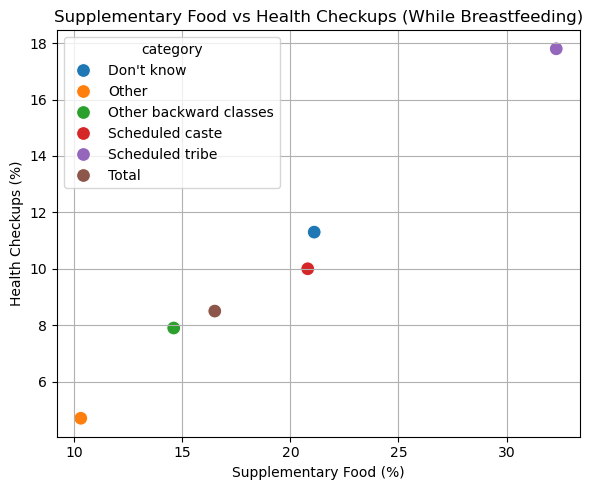

In [60]:
# Filter for "While Breastfeeding"
df_bf = icds_services[icds_services['icds_services'] == 'Mother received from an AWC while breast feeding']

# Plot
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df_bf,
    x='supplementary_food_%',
    y='health_checkups_%',
    hue='category',
    s=100
)
plt.title("Supplementary Food vs Health Checkups (While Breastfeeding)")
plt.xlabel("Supplementary Food (%)")
plt.ylabel("Health Checkups (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


üçº Insight: Supplementary Food vs Health Checkups (While Breastfeeding)
Scheduled Tribes show the highest service access (~32% food, ~18% checkups), reflecting consistent outreach.

Scheduled Castes and ‚ÄòDon‚Äôt Know‚Äô groups have moderate access (~20‚Äì21% food, ~10‚Äì11% checkups), but still show postnatal gaps.

OBCs and ‚ÄòOther‚Äô categories are the most underserved (~10‚Äì17% food, ~5‚Äì9% checkups), indicating limited engagement or follow-up.

üìå Recommendations:
Strengthen postnatal ICDS service delivery, especially for food and checkups.

Target underserved groups with focused awareness and outreach.

Improve data classification to ensure all social groups are appropriately tracked.

In [61]:
# Sort by highest no-services rate
# Sort by icds_services first, then no_services_%
df_sorted = icds_services.sort_values(by=['icds_services', 'no_services_%'], ascending=[True, False])

# View the sorted result
df_sorted[['category', 'icds_services', 'no_services_%']]


category  \
ROWID                           
3                       Other   
5      Other backward classes   
11                      Total   
7             Scheduled caste   
1                  Don't know   
9             Scheduled tribe   
4                       Other   
6      Other backward classes   
12                      Total   
8             Scheduled caste   
2                  Don't know   
10            Scheduled tribe   

                                          icds_services  no_services_%  
ROWID                                                                   
3          Mother received from an AWC during pregnancy           85.0  
5          Mother received from an AWC during pregnancy           79.3  
11         Mother received from an AWC during pregnancy           77.5  
7          Mother received from an AWC during pregnancy           72.5  
1          Mother received from an AWC during pregnancy           63.5  
9          Mother received from an AWC during pregnancy           59.8  
4      Mother received from an AWC while breast feeding           88.8  
6      Mother received from an AWC while breast feeding           84.5  
12     Mother received from an AWC while breast feeding           82.6  
8      Mother received from an AWC while breast feeding           78.5  
2      Mother received from an AWC while breast feeding           77.9  
10     Mother received from an AWC while breast feeding           66.3

üìä Insight: Percentage of Mothers Not Receiving Any ICDS Services
This table represents the percentage of mothers who received no services from an Anganwadi Centre (AWC) during pregnancy and while breastfeeding, across different social categories.

The metric used is no_services_%, which highlights service delivery gaps in ICDS outreach.

Key Observations:
During Pregnancy:
‚ÄòOther‚Äô category had the highest service exclusion at 85%, indicating extremely low ICDS outreach to this group.

Other Backward Classes (OBC) and Total category also saw high exclusion (~77‚Äì79%).

Scheduled Tribes (ST) had the lowest exclusion at 59.8%, showing better ICDS engagement compared to other groups.

While Breastfeeding:
Again, ‚ÄòOther‚Äô category remained most underserved at 88.8% with no services.

OBC and Total category followed with ~82‚Äì84% exclusion.

Scheduled Tribes still fared better, with only 66.3% receiving no services ‚Äî better than the general population average.


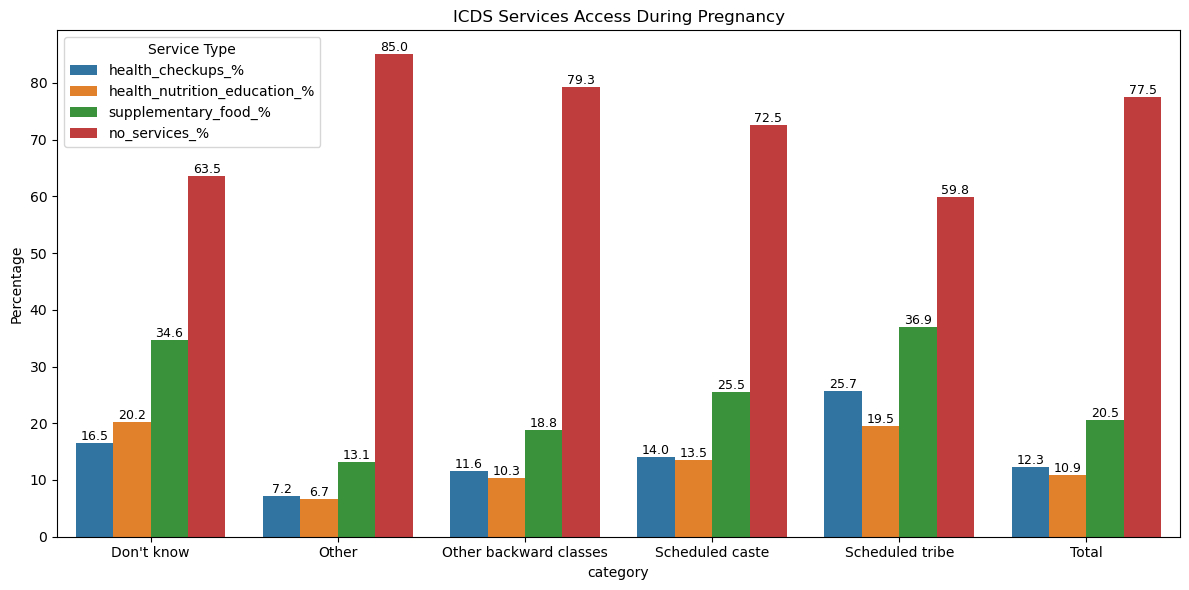

In [62]:
# Filter for "During Pregnancy"
df_preg = icds_services[icds_services['icds_services'] == 'Mother received from an AWC during pregnancy']

# Melt the dataframe for plotting
melted_preg = df_preg.melt(
    id_vars='category',
    value_vars=[
        'health_checkups_%',
        'health_nutrition_education_%',
        'supplementary_food_%',
        'no_services_%'
    ],
    var_name='Service Type',
    value_name='Percentage'
)

# Plot with percentage labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_preg, x='category', y='Percentage', hue='Service Type')
plt.title("ICDS Services Access During Pregnancy")
plt.xticks(rotation=0)
plt.ylabel("Percentage")

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


üìä Insight: ICDS Access During Pregnancy (By Social Group)
High Exclusion: Most groups have poor ICDS access. The ‚ÄòOther‚Äô group shows 85% exclusion, followed by OBC (79%) and SC (72%).

Scheduled Tribes have the best service access ‚Äî 25.7% checkups, 19.5% education, and 36.9% food, with the lowest exclusion (59.8%).

Disparities: OBC and 'Other' groups have very low checkups and food access. Nutrition education is low across all groups (<20%).

üìå Recommendations:
Improve outreach in OBC, SC, and ‚ÄòOther‚Äô groups.

Strengthen delivery of nutrition education, the most neglected service.

Conduct local audits to identify service gaps.

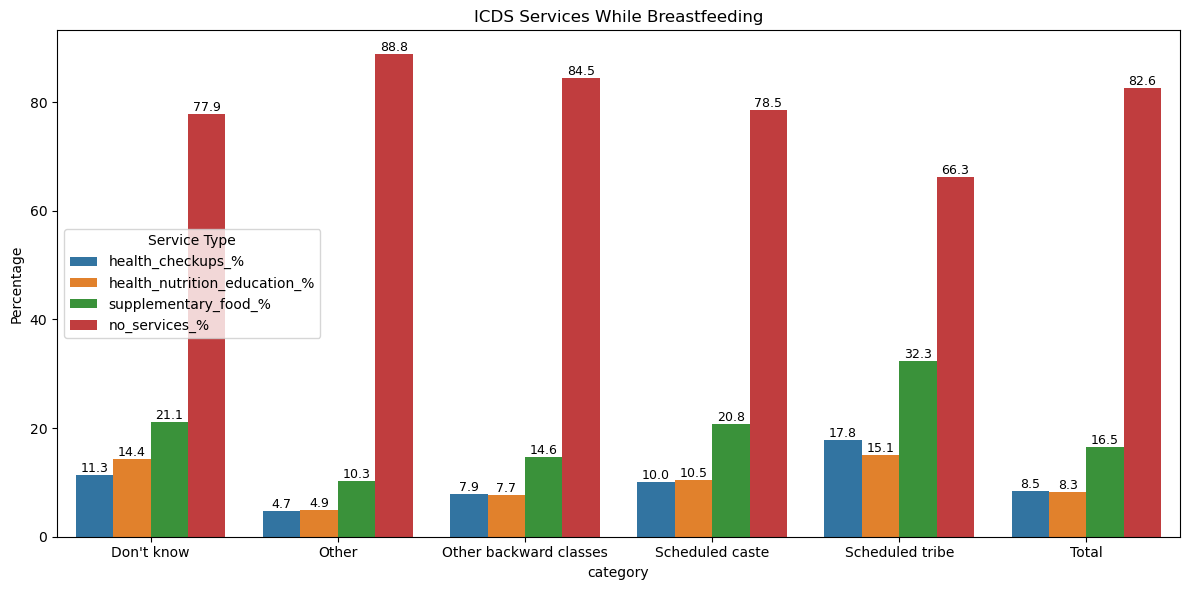

In [63]:
# Filter for "While Breastfeeding"
df_bf = icds_services[icds_services['icds_services'] == 'Mother received from an AWC while breast feeding']

# Melt the dataframe for plotting
melted_bf = df_bf.melt(
    id_vars='category',
    value_vars=[
        'health_checkups_%',
        'health_nutrition_education_%',
        'supplementary_food_%',
        'no_services_%'
    ],
    var_name='Service Type',
    value_name='Percentage'
)

# Plot with percentage labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_bf, x='category', y='Percentage', hue='Service Type')
plt.title("ICDS Services While Breastfeeding")
plt.xticks(rotation=0)
plt.ylabel("Percentage")

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

üìä Insight: ICDS Services for Breastfeeding Mothers (By Social Group)
High Exclusion: Most mothers receive no services ‚Äî ‚ÄòOther‚Äô (88.8%), OBC (84.5%), and overall (82.6%).

Scheduled Tribes show the highest access (checkups: 17.8%, food: 32.3%) and lowest exclusion (66.3%).

Health education access is extremely low across all groups, especially ‚ÄòOther‚Äô (4.9%).

üìå Recommendations:
Improve ICDS outreach during the postpartum period.

Prioritize underserved groups (OBC, SC, Other) for targeted interventions.

Boost nutrition education efforts through community and NGO-led programs.

Evaluate AWC capacity and coverage in low-performing areas.

### üìå Supplementary Food Frequency Patterns

In [65]:
supplementary_food.sort_index(inplace=True)

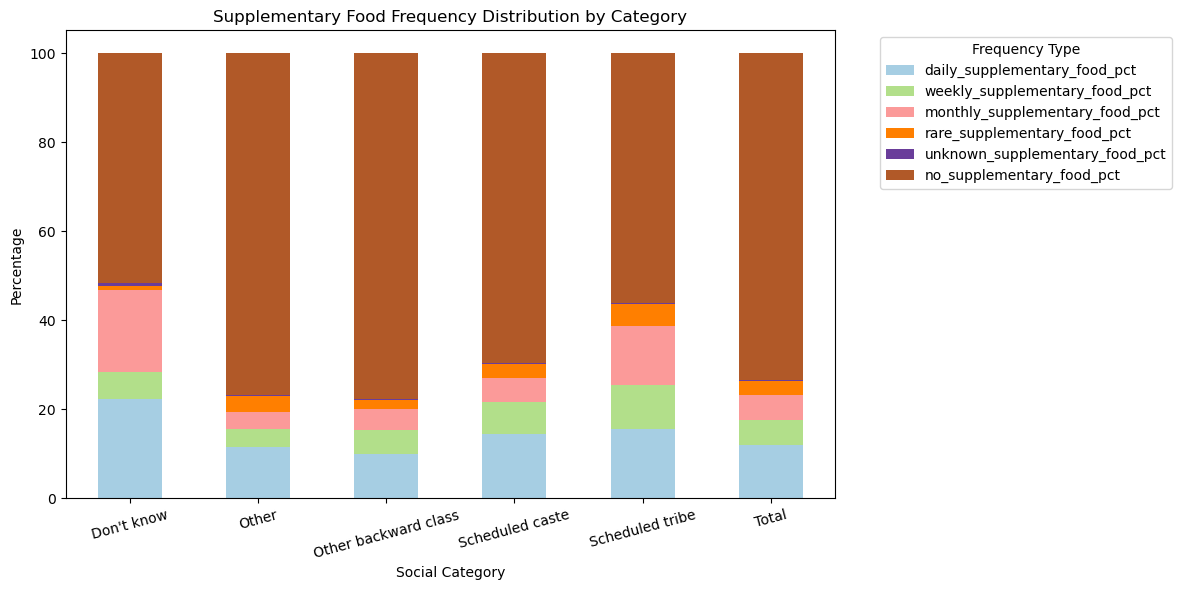

In [66]:
df_plot = supplementary_food.set_index('category')[
    [
        'daily_supplementary_food_pct',
        'weekly_supplementary_food_pct',
        'monthly_supplementary_food_pct',
        'rare_supplementary_food_pct',
        'unknown_supplementary_food_pct',
        'no_supplementary_food_pct'
    ]
]

# Plot
df_plot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired')
plt.title("Supplementary Food Frequency Distribution by Category")
plt.ylabel("Percentage")
plt.xlabel("Social Category")
plt.xticks(rotation=15)
plt.legend(title='Frequency Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ü•£ Insight: Supplementary Food Frequency (By Social Group)
70‚Äì80% of women across all categories received no food support, with ‚ÄòOther‚Äô and OBCs most underserved.

Scheduled Tribes had the highest daily and monthly distribution, showing relatively better access.

Weekly food support is minimal, and even best-performing groups rarely exceed 20% daily access.

üìå Recommendations:
Target OBC and ‚ÄòOther‚Äô groups for improved food outreach.

Increase distribution frequency, aiming for weekly or more.

Launch awareness drives on nutrition entitlements during and after pregnancy.

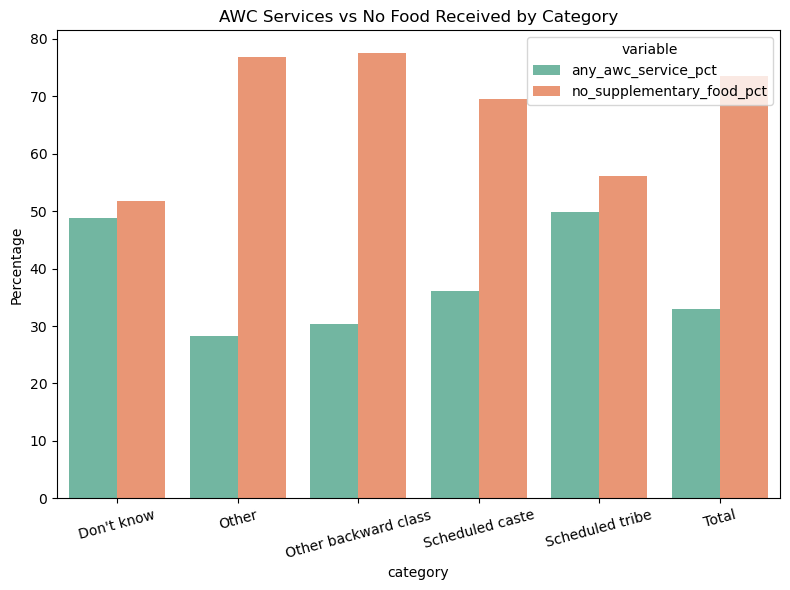

In [67]:
df_compare = supplementary_food[['category', 'any_awc_service_pct', 'no_supplementary_food_pct']].melt(id_vars='category')

plt.figure(figsize=(8, 6))
sns.barplot(data=df_compare, x='category', y='value', hue='variable', palette='Set2')
plt.title("AWC Services vs No Food Received by Category")
plt.ylabel("Percentage")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


üè• AWC Services vs. Lack of Supplementary Food ‚Äì Key Insight
Despite moderate to high access to AWC services, a large proportion of women did not receive supplementary food across all social groups:

OBCs and Others have the widest gap, with over 75% not receiving food despite some AWC engagement.

Even for Scheduled Tribes, who have the highest AWC access (~50%), around 56% received no food.

This suggests a major service delivery gap: AWC reach exists, but nutritional service delivery is falling short.

‚úÖ Recommendation: Strengthen monitoring and ensure that AWC visits translate into actual food provision, especially in vulnerable groups.

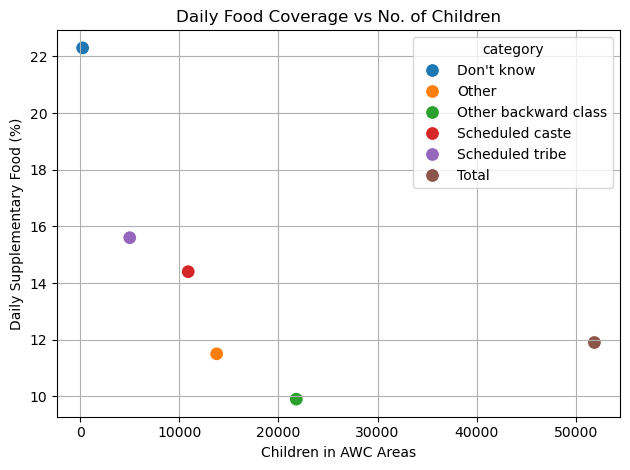

In [68]:
sns.scatterplot(data=supplementary_food, 
                x='num_children_awc_area', 
                y='daily_supplementary_food_pct', 
                hue='category', s=100)

plt.title("Daily Food Coverage vs No. of Children")
plt.xlabel("Children in AWC Areas")
plt.ylabel("Daily Supplementary Food (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

üçΩÔ∏è Daily Supplementary Food vs. AWC Coverage of Children
This scatter plot reveals an inverse trend between the number of children covered by AWC and the percentage receiving daily supplementary food:

Categories with fewer children (like Don‚Äôt know, Scheduled Tribe) have higher daily food coverage (15‚Äì22%).

Conversely, groups with higher child counts (Other backward class, Total) have lower daily food provision (~10‚Äì12%).

üìå Key Insight: This suggests that resource strain or logistical limitations might be affecting daily food service delivery in high-child-density areas.

Recommendation: Strategically scale up daily food provision where child coverage is higher to ensure equity in nutritional outreach.

### üìå Health Checkup Frequency Patterns

In [70]:
health_checkups.sort_index(inplace=True)

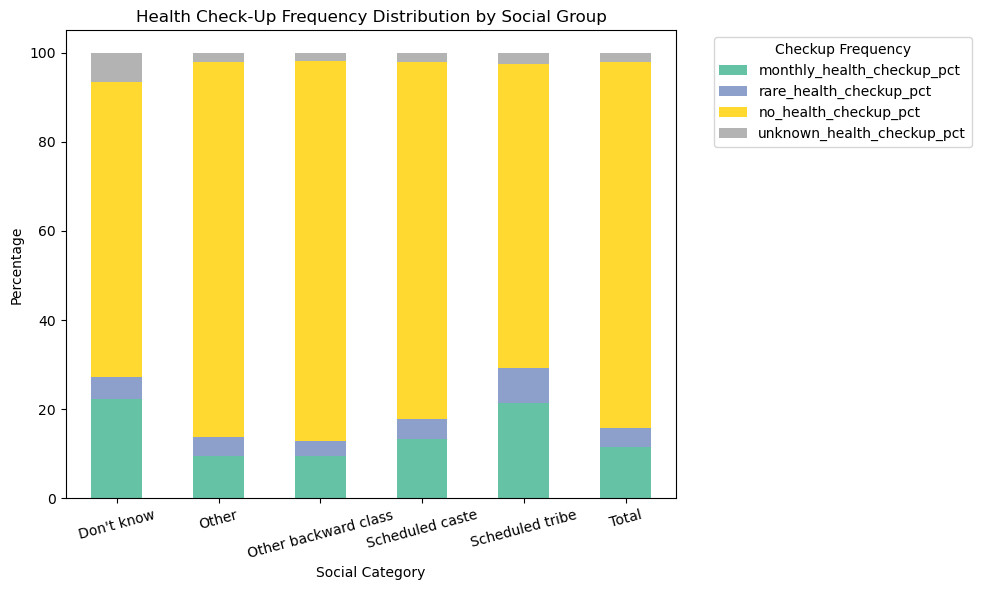

In [71]:
df_plot = health_checkups.set_index('category')[
    ['monthly_health_checkup_pct',
     'rare_health_checkup_pct',
     'no_health_checkup_pct',
     'unknown_health_checkup_pct']
]

df_plot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Health Check-Up Frequency Distribution by Social Group")
plt.ylabel("Percentage")
plt.xlabel("Social Category")
plt.xticks(rotation=15)
plt.legend(title='Checkup Frequency', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


ü©∫ Health Check-Up Frequency by Social Group
This chart highlights significant gaps in access to regular health check-ups across social categories:

"No Health Check-up" dominates across all categories, consistently exceeding 70‚Äì80%, indicating a major outreach gap.

Monthly check-ups are highest among Scheduled Tribes and ‚ÄúDon‚Äôt Know‚Äù categories (~21‚Äì22%), showing slightly better access.

‚ÄúOther backward classes‚Äù and ‚ÄúOther‚Äù categories have the lowest rates of monthly check-ups (~10‚Äì12%), suggesting the need for focused intervention.

Rare and unknown frequency check-ups contribute very little, but still reflect inconsistency in service delivery or awareness.

‚úçÔ∏è Key Takeaway:
The overwhelming lack of regular health check-ups across all groups is a major concern. Tailored health outreach strategies and stronger community engagement are crucial to improve routine maternal care, especially in marginalized categories.

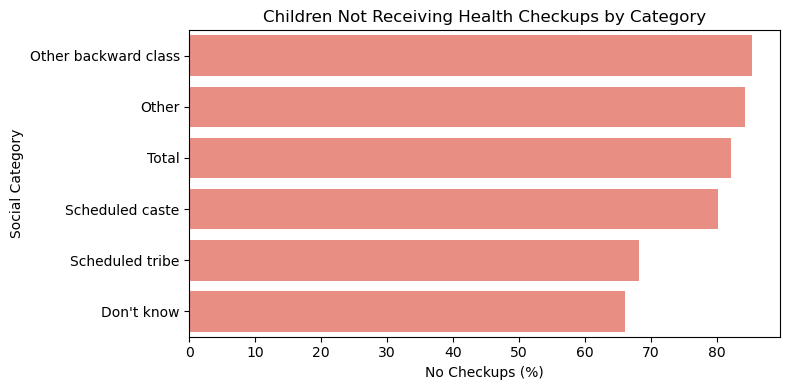

In [72]:
df_sorted = health_checkups.sort_values(by='no_health_checkup_pct', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=df_sorted, y='category', x='no_health_checkup_pct', color='salmon')
plt.title("Children Not Receiving Health Checkups by Category")
plt.xlabel("No Checkups (%)")
plt.ylabel("Social Category")
plt.tight_layout()
plt.show()


‚ùå Children Not Receiving Health Checkups (by Social Group)
This chart highlights the alarming percentage of children not receiving health checkups across different social groups:

‚ÄúOther backward class‚Äù, ‚ÄúOther‚Äù, and Total categories show the highest non-checkup rates, all exceeding 80%.

Even among Scheduled Castes, nearly 78% of children are missing checkups.

Scheduled Tribes and ‚ÄúDon‚Äôt Know‚Äù groups show relatively better checkup coverage, though still high at 66‚Äì68%.

üß≠ Key Takeaway:
There is a systemic gap in child health monitoring across all social groups. Special focus is needed on underperforming categories like OBC and general rural groups, while also sustaining improvements in tribal outreach.

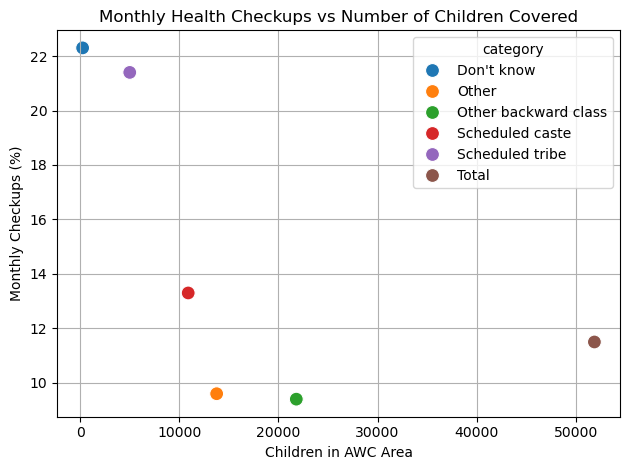

In [73]:
sns.scatterplot(
    data=health_checkups,
    x='num_children_awc_area',
    y='monthly_health_checkup_pct',
    hue='category',
    s=100
)

plt.title("Monthly Health Checkups vs Number of Children Covered")
plt.xlabel("Children in AWC Area")
plt.ylabel("Monthly Checkups (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


üìà Monthly Health Checkups vs Children in AWC Areas
This scatter plot shows the relationship between the number of children covered and the percentage receiving monthly health checkups across social categories:

"Don't Know" and Scheduled Tribe categories have the highest checkup rates (~22% and 21.5%) but cover a very small child population.

As the number of children increases, monthly checkup coverage drops ‚Äî seen in OBC and Total categories with over 20,000‚Äì50,000 children, where coverage drops to 9‚Äì12%.

This inverse trend suggests that resource constraints or workforce limitations may impact service delivery as child population increases.

üß≠ Key Takeaway:
To ensure equity, it‚Äôs essential to scale health worker capacity or introduce targeted interventions in high-child-density areas to maintain consistent service quality.

### üçº Infant Mortality and Perinatal Health Disparities

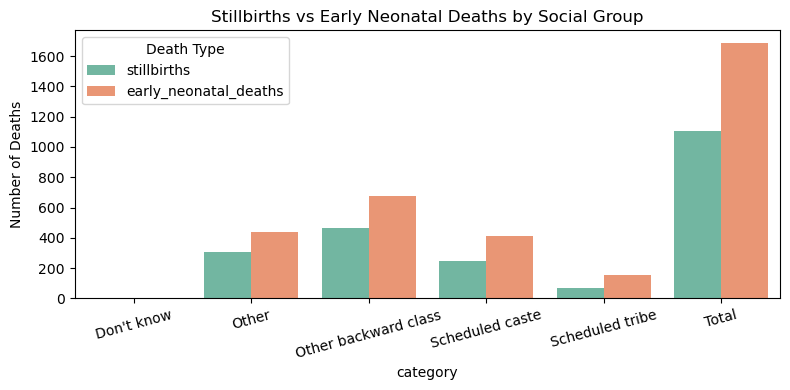

In [76]:
# Melt the dataset for grouped plotting
df_melted = infant_mortality.melt(
    id_vars='category',
    value_vars=['stillbirths', 'early_neonatal_deaths'],
    var_name='Death Type',
    value_name='Count'
)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=df_melted, x='category', y='Count', hue='Death Type', palette='Set2')
plt.title("Stillbirths vs Early Neonatal Deaths by Social Group")
plt.xticks(rotation=15)
plt.ylabel("Number of Deaths")
plt.tight_layout()
plt.show()


‚ö∞Ô∏è Stillbirths vs Early Neonatal Deaths Across Social Groups
This chart compares stillbirths and early neonatal deaths (0‚Äì6 days) by social group:

Early neonatal deaths consistently exceed stillbirths across all social categories, highlighting a critical concern in postnatal care.

Other Backward Class and Scheduled Caste groups show notably higher mortality than others, indicating a need for targeted health interventions.

Scheduled Tribe group shows the lowest absolute deaths, but this may reflect population size more than health outcomes.

The total deaths (combined) indicate a systemic gap in prenatal and neonatal healthcare delivery.

üö® Key Takeaway:
To reduce early neonatal mortality, there is an urgent need for:

Improved institutional delivery access

Stronger postnatal monitoring

Strengthening of maternal and newborn care in marginalized communities

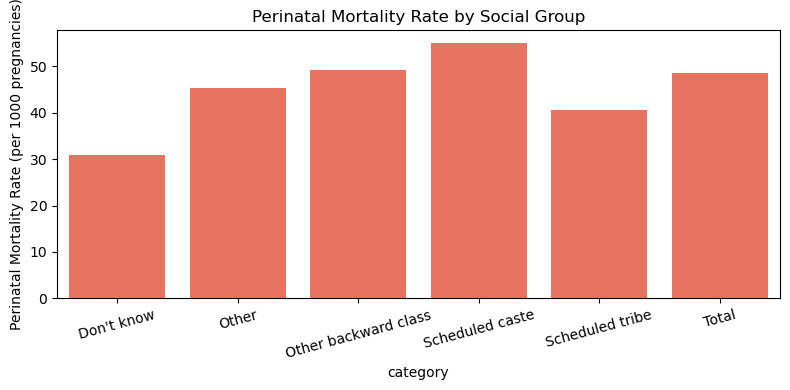

In [78]:
plt.figure(figsize=(8, 4))
sns.barplot(data=infant_mortality, x='category', y='perinatal_mortality_rate', color='tomato')
plt.title("Perinatal Mortality Rate by Social Group")
plt.xticks(rotation=15)
plt.ylabel("Perinatal Mortality Rate (per 1000 pregnancies)")
plt.tight_layout()
plt.show()

üìä Perinatal Mortality Rate (PMR) by Social Group
This chart presents the perinatal mortality rate (PMR)‚Äîthe number of stillbirths and early neonatal deaths per 1,000 pregnancies of 7+ months‚Äîacross different social groups:

Scheduled Caste shows the highest PMR, indicating elevated risk factors during late pregnancy and childbirth in this group.

Other Backward Class and ‚ÄòOther‚Äô social categories also report above-average PMR, highlighting systemic inequalities in maternal and newborn care.

Scheduled Tribe group has a moderate PMR, though still concerning given its vulnerability status.

"Don't know" group reports the lowest PMR, though this may reflect incomplete reporting rather than actual outcomes.

‚ö†Ô∏è Key Takeaway:
Higher PMR among marginalized groups suggests the need for:

Improved prenatal and delivery care access

Enhanced maternal health outreach in vulnerable communities

Monitoring socioeconomic disparities in health outcomes

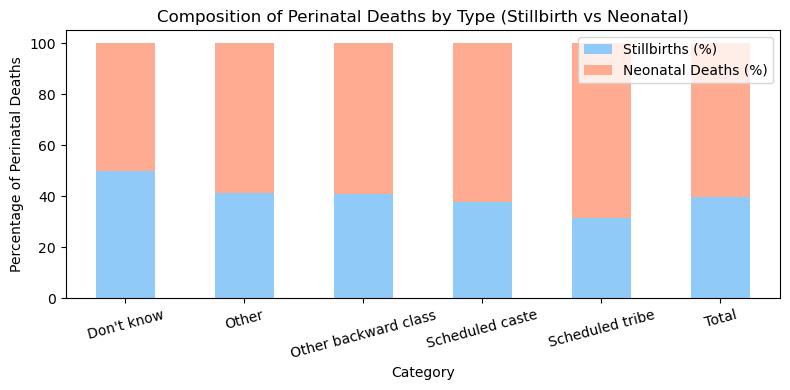

In [80]:
# Calculate total perinatal deaths
infant_mortality['total_perinatal_deaths'] = infant_mortality['stillbirths'] + infant_mortality['early_neonatal_deaths']

# Calculate percentage composition
infant_mortality['stillbirth_pct'] = (infant_mortality['stillbirths'] / infant_mortality['total_perinatal_deaths']) * 100
infant_mortality['neonatal_pct'] = (infant_mortality['early_neonatal_deaths'] / infant_mortality['total_perinatal_deaths']) * 100

# Prepare for stacked bar plot
composition_df = infant_mortality[['category', 'stillbirth_pct', 'neonatal_pct']].set_index('category')

# Plot stacked bar chart
composition_df.plot(kind='bar', stacked=True, figsize=(8,4), color=['#90CAF9', '#FFAB91'])
plt.title("Composition of Perinatal Deaths by Type (Stillbirth vs Neonatal)")
plt.ylabel("Percentage of Perinatal Deaths")
plt.xlabel("Category")
plt.legend(['Stillbirths (%)', 'Neonatal Deaths (%)'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


‚öñÔ∏è Composition of Perinatal Deaths by Social Group
This chart breaks down perinatal deaths into stillbirths and early neonatal deaths (0‚Äì6 days) across various social groups:

Early neonatal deaths account for the majority share (‚âà60%) of perinatal mortality across most groups.

The Scheduled Tribe group shows the highest share of neonatal deaths (~68%), suggesting challenges with postnatal care or neonatal health services.

The "Don't know" group is an exception, with stillbirths and neonatal deaths nearly balanced, possibly indicating gaps in data reporting.

The Scheduled Caste and Other Backward Class also exhibit a higher neonatal share, implying need for focused interventions immediately after birth.

üß† Insight:
While reducing stillbirths is vital, the higher proportion of neonatal deaths across all groups signals that improving immediate postnatal care‚Äîincluding skilled birth attendance, neonatal ICU access, and maternal education‚Äîis crucial.

### üìå Combined Analysis : Health checkups, Supplementary food, Perinatal mortality rate

In [100]:
# Step 1: Calculate % of children with NO health checkups by group
no_checkups = health_checkups[['category', 'no_health_checkup_pct']].groupby('category').mean().reset_index()
no_checkups.rename(columns={'no_health_checkup_pct': 'No Health Checkups (%)'}, inplace=True)

# Step 2: Calculate % of mothers who received NO supplementary food
no_food = supplementary_food[['category', 'no_supplementary_food_pct']].groupby('category').mean().reset_index()
no_food.rename(columns={'no_supplementary_food_pct': 'No Supplementary Food (%)'}, inplace=True)

# Step 3: Extract perinatal mortality rate
mortality = infant_mortality[['category', 'perinatal_mortality_rate']].groupby('category').mean().reset_index()
mortality.rename(columns={'perinatal_mortality_rate': 'Perinatal Mortality Rate'}, inplace=True)

# Step 4: Merge all summaries into one table
merged = no_checkups.merge(no_food, on='category', how='outer')
merged = merged.merge(mortality, on='category', how='outer')

# Optional: Rename background_group for display
merged.rename(columns={'category': 'Social Group'}, inplace=True)

# Display the final combined summary
disparity_df = merged.sort_values(by='Social Group').reset_index(drop=True)

disparity_df.style\
    .format({
        'No Health Checkups (%)': '{:.1f}',
        'No Supplementary Food (%)': '{:.1f}',
        'Perinatal Mortality Rate': '{:.1f}'
    })\
    .background_gradient(
        subset=['No Health Checkups (%)', 'No Supplementary Food (%)', 'Perinatal Mortality Rate'],
        cmap='OrRd'
    )


####
### üìå Key Takeaways
High Service Gaps: Across most social categories, especially Scheduled Castes and Other Backward Classes, there are alarmingly high percentages of children and mothers not receiving basic health checkups or supplementary nutrition.

Disproportionate Burden on Vulnerable Groups: While Scheduled Tribes perform relatively better in health checkups, they still show considerable gaps in food support and have a notable perinatal mortality rate.

Infant Mortality & Access: Higher perinatal mortality among Scheduled Castes and Other Backward Classes may reflect poor access to timely healthcare and antenatal support.

### üõ†Ô∏è Recommendations:
Targeted Outreach: Strengthen Anganwadi and ICDS coverage in underperforming social groups with emphasis on Scheduled Caste and OBC areas.

Staffing Balance: Improve gender and role-based workforce distribution (especially male HWs and CHC-level coverage).

Monitoring & Accountability: Implement community-level tracking and feedback systems to ensure service delivery reaches the last mile.

### ‚úÖ Overall Conclusion
This analysis highlights critical disparities in health infrastructure, ICDS service utilization, and maternal-child outcomes across different social groups, especially in tribal and rural communities.

üîç Key Insights:

ICDS service exclusion is alarmingly high across all groups, with OBCs and ‚ÄòOther‚Äô categories being the most underserved.

Scheduled Tribes consistently show better access to health checkups, nutrition education, and supplementary food‚Äîsuggesting that targeted programs in tribal areas may be more effective.

Postnatal service delivery (during breastfeeding) is significantly weaker than antenatal care, indicating a need for improved continuity of care.

Health education access remains critically low (<20%) across all groups.

Health infrastructure, especially CHCs, is overburdened, and male health workers are significantly understaffed, limiting balanced care delivery.

Perinatal mortality is highest among SC and OBC groups, correlating with service gaps.



### üìå Final Recommendations:

Strengthen Outreach to Underserved Groups
Prioritize OBCs, Scheduled Castes, and ‚ÄòOther‚Äô categories through focused programs and localized strategies.

Ensure Continuity of Care
Improve integration of antenatal and postnatal services, ensuring mothers are supported before and after delivery.

Boost Nutrition Education
Launch community-based health and nutrition awareness campaigns, particularly where access is lowest.

Improve Infrastructure & Staffing
Invest in CHC capacity, and address the gender imbalance in health worker staffing at subcentres and PHCs.

Enhance Data Quality & Classification
Standardize social group labels in datasets to avoid under-documentation of marginalized communities (e.g., ‚ÄúDon‚Äôt Know‚Äù, ‚ÄúOther‚Äù).

Leverage NGOs & Community Systems
Involve NGOs and local bodies to extend the reach of ICDS services and bridge gaps in service delivery.

This project underscores the value of data-driven decision-making in identifying inequities and designing inclusive public health strategies. The insights generated can support NGOs, policy makers, and local bodies in targeting interventions where they are needed most.